In [108]:
import numpy as np
import pandas as pd


In [109]:
from ast import literal_eval
train = pd.read_csv('train.csv', converters={'Product_Holding_B1': literal_eval , 
                                             'Product_Holding_B2': literal_eval})


test = pd.read_csv('test.csv', converters={'Product_Holding_B1': literal_eval})
                                             


In [110]:
train.head(10)

,Customer_ID,Gender,Age,Vintage,Is_Active,City_Category,Customer_Category,Product_Holding_B1,Product_Holding_B2
0,CC264719,Male,41,14,0,C1,S3,[P16],[P8]
1,CC209679,Female,47,14,1,C1,S2,"[P13, P20]",[P3]
2,CC319633,Female,59,14,0,C2,S2,[P11],[P00]
3,CC231413,Female,32,16,0,C1,S2,"[P8, P13]",[P6]
4,CC259633,Male,30,15,0,C2,S3,"[P16, P17, P21]","[P8, P12]"
5,CC384429,Female,28,12,0,C1,S2,[P17],[P16]
6,CC233048,Male,30,17,0,C1,S2,"[P16, P17]",[P8]
7,CC370586,Male,44,16,1,C2,S2,"[P16, P21]","[P1, P12]"
8,CC358694,Male,47,44,0,C2,S3,"[P13, P20]",[P12]
9,CC316464,Male,26,12,0,C2,S3,"[P13, P21]",[P9]


In [111]:
test.head(10)

,Customer_ID,Gender,Age,Vintage,Is_Active,City_Category,Customer_Category,Product_Holding_B1
0,CC372708,Female,31,31,0,C2,S3,"[P12, P13]"
1,CC216072,Male,28,37,1,C1,S2,"[P12, P13]"
2,CC387629,Male,31,12,0,C2,S3,[P20]
3,CC389228,Female,55,11,0,C2,S2,"[P13, P21]"
4,CC394445,Male,51,49,1,C2,S1,[P13]
5,CC241088,Male,58,17,0,C2,S1,"[P13, P20]"
6,CC381551,Male,46,12,0,C2,S3,[P17]
7,CC238627,Male,40,17,0,C1,S3,"[P16, P20]"
8,CC287515,Female,59,13,0,C2,S3,[P16]
9,CC312519,Male,32,16,0,C1,S3,"[P10, P12, P16]"


In [112]:
train.isnull().sum()

Customer_ID           0
Gender                0
Age                   0
Vintage               0
Is_Active             0
City_Category         0
Customer_Category     0
Product_Holding_B1    0
Product_Holding_B2    0
dtype: int64

In [113]:
test.isnull().sum()

Customer_ID           0
Gender                0
Age                   0
Vintage               0
Is_Active             0
City_Category         0
Customer_Category     0
Product_Holding_B1    0
dtype: int64

In [114]:
df1 = train[['Product_Holding_B1']]
df2 = train[['Product_Holding_B2']]
df3 = test[['Product_Holding_B1']]

In [115]:
mlb = MultiLabelBinarizer()
df1 = df1.join(pd.DataFrame(mlb.fit_transform(df1.pop('Product_Holding_B1')),
                          columns=mlb.classes_,
                          index=df1.index))
df2 = df2.join(pd.DataFrame(mlb.fit_transform(df2.pop('Product_Holding_B2')),
                          columns=mlb.classes_,
                          index=df2.index))
df3 = df3.join(pd.DataFrame(mlb.fit_transform(df3.pop('Product_Holding_B1')),
                          columns=mlb.classes_,
                          index=df3.index))


In [116]:
df1_cols = df1.columns
df1_cols = "B1_"+df1_cols
df1.columns = df1_cols

df2_cols = df2.columns
df2_cols = "B2_"+df2_cols
df2.columns = df2_cols

df3_cols = df3.columns
df3_cols = "B1_"+df3_cols
df3.columns = df3_cols


In [117]:

df1

,B1_P00,B1_P1,B1_P10,B1_P11,B1_P12,B1_P13,B1_P14,B1_P15,B1_P16,B1_P17,...,B1_P2,B1_P20,B1_P21,B1_P3,B1_P4,B1_P5,B1_P6,B1_P7,B1_P8,B1_P9
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37743,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
37744,0,0,0,0,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
37745,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37746,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [118]:
df2

,B2_P00,B2_P1,B2_P10,B2_P11,B2_P12,B2_P13,B2_P14,B2_P15,B2_P16,B2_P17,B2_P18,B2_P2,B2_P20,B2_P3,B2_P4,B2_P5,B2_P6,B2_P7,B2_P8,B2_P9
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37743,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
37744,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
37745,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
37746,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [119]:
df3

,B1_P00,B1_P1,B1_P10,B1_P11,B1_P12,B1_P13,B1_P14,B1_P15,B1_P16,B1_P17,...,B1_P2,B1_P20,B1_P21,B1_P3,B1_P4,B1_P5,B1_P6,B1_P7,B1_P8,B1_P9
0,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20322,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
20323,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
20324,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20325,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1


In [120]:
train.drop(['Product_Holding_B1','Product_Holding_B2'],axis=1,inplace=True)
test.drop(['Product_Holding_B1'],axis=1,inplace=True)

In [121]:
train.head()

,Customer_ID,Gender,Age,Vintage,Is_Active,City_Category,Customer_Category
0,CC264719,Male,41,14,0,C1,S3
1,CC209679,Female,47,14,1,C1,S2
2,CC319633,Female,59,14,0,C2,S2
3,CC231413,Female,32,16,0,C1,S2
4,CC259633,Male,30,15,0,C2,S3


In [124]:
train =pd.concat([train,df1,df2],axis=1)
train

,Customer_ID,Gender,Age,Vintage,Is_Active,City_Category,Customer_Category,B1_P00,B1_P1,B1_P10,...,B2_P18,B2_P2,B2_P20,B2_P3,B2_P4,B2_P5,B2_P6,B2_P7,B2_P8,B2_P9
0,CC264719,Male,41,14,0,C1,S3,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,CC209679,Female,47,14,1,C1,S2,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,CC319633,Female,59,14,0,C2,S2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CC231413,Female,32,16,0,C1,S2,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,CC259633,Male,30,15,0,C2,S3,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37743,CC314217,Male,28,24,1,C1,S2,0,0,0,...,0,0,0,0,0,0,0,0,0,1
37744,CC388747,Male,36,11,0,C2,S2,0,0,0,...,0,0,0,0,0,1,0,0,0,0
37745,CC318056,Male,44,26,1,C2,S2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37746,CC373551,Female,56,15,1,C1,S2,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [125]:
test =pd.concat([test,df3],axis=1)
test

,Customer_ID,Gender,Age,Vintage,Is_Active,City_Category,Customer_Category,B1_P00,B1_P1,B1_P10,...,B1_P2,B1_P20,B1_P21,B1_P3,B1_P4,B1_P5,B1_P6,B1_P7,B1_P8,B1_P9
0,CC372708,Female,31,31,0,C2,S3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CC216072,Male,28,37,1,C1,S2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CC387629,Male,31,12,0,C2,S3,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,CC389228,Female,55,11,0,C2,S2,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,CC394445,Male,51,49,1,C2,S1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20322,CC303542,Female,37,11,1,C2,S3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20323,CC266713,Male,29,14,0,C2,S2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20324,CC393639,Male,26,12,0,C2,S3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20325,CC285013,Female,44,19,1,C1,S3,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [127]:
train.describe(include='all')

,Customer_ID,Gender,Age,Vintage,Is_Active,City_Category,Customer_Category,B1_P00,B1_P1,B1_P10,...,B2_P18,B2_P2,B2_P20,B2_P3,B2_P4,B2_P5,B2_P6,B2_P7,B2_P8,B2_P9
count,37748,37748,37748.000000,37748.000000,37748.000000,37748,37748,37748.000000,37748.000000,37748.000000,...,37748.000000,37748.000000,37748.000000,37748.000000,37748.000000,37748.000000,37748.000000,37748.000000,37748.000000,37748.000000
unique,37748,2,NaN,NaN,NaN,2,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,CC264179,Male,NaN,NaN,NaN,C1,S3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,25890,NaN,NaN,NaN,18941,17865,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,38.521379,19.573169,0.264809,NaN,NaN,0.026862,0.000318,0.038995,...,0.000053,0.005457,0.000106,0.065858,0.077964,0.032081,0.123848,0.066917,0.305129,0.048559
std,NaN,NaN,10.121811,10.252417,0.441237,NaN,NaN,0.161683,0.017827,0.193587,...,0.007279,0.073672,0.010294,0.248037,0.268119,0.176218,0.329412,0.249882,0.460468,0.214947
min,NaN,NaN,24.000000,2.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,29.000000,13.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,37.000000,16.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,47.000000,23.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000


In [128]:
train.drop(['Customer_ID'],axis=1,inplace=True)
test.drop(['Customer_ID'],axis=1,inplace=True)

/Users/Adit/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

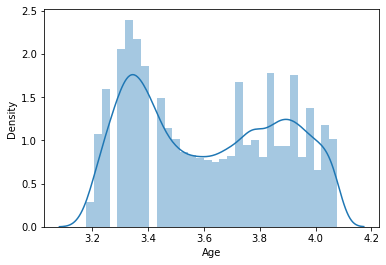

In [134]:
import seaborn as sns

sns.distplot(np.log(train.Age))

/Users/Adit/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Vintage', ylabel='Density'>

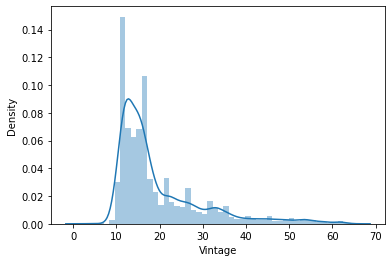

In [132]:
sns.distplot(train.Vintage)

/Users/Adit/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Vintage', ylabel='Density'>

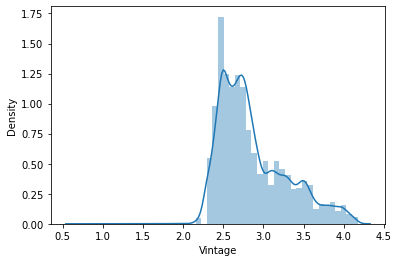

In [133]:
sns.distplot(np.log(train.Vintage))

In [135]:
from scipy.stats import skew

skew(train.Age)

0.3753776884676285

In [136]:
skew(train.Vintage)

1.826175872670502

In [137]:
print(skew(np.log(train.Age)))
print(skew(np.log(train.Vintage)))

0.11840491389996662
0.9116674958981176


In [138]:
print(skew(np.sqrt(train.Age)))
print(skew(np.sqrt(train.Vintage)))

0.245920678697149
1.3517726441793327


In [140]:
from scipy import stats

print(skew(stats.boxcox(train.Age)[0]))
print(skew(stats.boxcox(train.Vintage)[0]))

0.037884232242195774
-0.03995835910254976


/Users/Adit/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

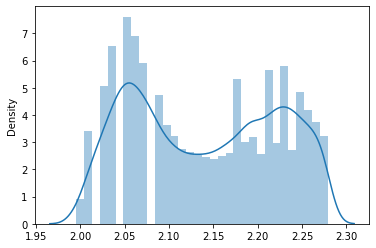

In [142]:
sns.distplot(stats.boxcox(train.Age)[0])

/Users/Adit/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

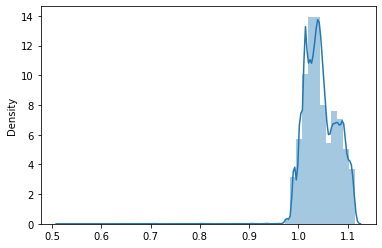

In [143]:
sns.distplot(stats.boxcox(train.Vintage)[0])

In [148]:
train.Age = stats.boxcox(train.Age)[0]
test.Age = stats.boxcox(test.Age)[0]

train.Vintage = stats.boxcox(train.Vintage)[0]
test.Vintage = stats.boxcox(test.Vintage)[0]


In [149]:
train


,Gender,Age,Vintage,Is_Active,City_Category,Customer_Category,B1_P00,B1_P1,B1_P10,B1_P11,...,B2_P18,B2_P2,B2_P20,B2_P3,B2_P4,B2_P5,B2_P6,B2_P7,B2_P8,B2_P9
0,Male,2.173919,1.030320,0,C1,S3,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,Female,2.214697,1.030320,1,C1,S2,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,Female,2.278763,1.030320,0,C2,S2,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,Female,2.095219,1.042878,0,C1,S2,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,Male,2.073681,1.036991,0,C2,S3,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37743,Male,2.050159,1.073151,1,C1,S2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
37744,Male,2.133399,1.003570,0,C2,S2,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
37745,Male,2.195226,1.077960,1,C2,S2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37746,Female,2.264469,1.036991,1,C1,S2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [150]:
from sklearn import preprocessing
 
label_encoder = preprocessing.LabelEncoder()
 
train['Gender']= label_encoder.fit_transform(train['Gender'])
test['Gender']= label_encoder.fit_transform(test['Gender'])

train['City_Category']= label_encoder.fit_transform(train['City_Category'])
test['City_Category']= label_encoder.fit_transform(test['City_Category'])

train['Customer_Category']= label_encoder.fit_transform(train['Customer_Category'])
test['Customer_Category']= label_encoder.fit_transform(test['Customer_Category'])

In [151]:
train.head()

,Gender,Age,Vintage,Is_Active,City_Category,Customer_Category,B1_P00,B1_P1,B1_P10,B1_P11,...,B2_P18,B2_P2,B2_P20,B2_P3,B2_P4,B2_P5,B2_P6,B2_P7,B2_P8,B2_P9
0,1,2.173919,1.030320,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,2.214697,1.030320,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,2.278763,1.030320,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,2.095219,1.042878,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,2.073681,1.036991,0,1,2,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [152]:
test.head()

,Gender,Age,Vintage,Is_Active,City_Category,Customer_Category,B1_P00,B1_P1,B1_P10,B1_P11,...,B1_P2,B1_P20,B1_P21,B1_P3,B1_P4,B1_P5,B1_P6,B1_P7,B1_P8,B1_P9
0,0,1.845244,1.030308,0,1,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1.819713,1.036980,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1.845244,0.967950,0,1,2,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,1.970799,0.958982,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,1.955897,1.045554,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [153]:
pd.to_csv("train_updated.csv",train)
pd.to_csv("test_updated.csv",test)

AttributeError: module 'pandas' has no attribute 'to_csv'